In [19]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
product_categories = ['Electronics', 'Clothing', 'Home', 'Books', 'Toys', 'Sports']
payment_methods = ['Credit Card', 'PayPal', 'Bank Transfer', 'Cash']
regions = ['North', 'South', 'East', 'West', 'Central']

In [3]:
rows = []
start_date = datetime(2023, 1, 1)

In [4]:
for i in range(300):
    customer_id = random.randint(1000, 1100)
    order_date = start_date + timedelta(days=random.randint(0, 365))
    order_amount = round(random.uniform(10, 500), 2)
    product_category = random.choice(product_categories)
    payment_method = random.choice(payment_methods)
    region = random.choice(regions)
    frequency = random.randint(1, 20)
    recency = (datetime(2024, 7, 23) - order_date).days  
    
    rows.append([
        customer_id, order_date.date(), order_amount, product_category,
        payment_method, region, frequency, recency
    ])

In [5]:
df = pd.DataFrame(rows, columns=[
    'CustomerID', 'OrderDate', 'OrderAmount', 'ProductCategory',
    'PaymentMethod', 'Region', 'Frequency', 'Recency'
])

In [6]:
df.to_csv('ecommerce_customer_data.csv', index=False)

In [7]:
df = pd.read_csv('ecommerce_customer_data.csv')

In [8]:
print(df.head())

   CustomerID   OrderDate  OrderAmount ProductCategory  PaymentMethod Region  \
0        1047  2023-01-28        74.96          Sports  Bank Transfer  South   
1        1036  2023-04-18       101.74        Clothing           Cash  North   
2        1032  2023-07-04       223.97        Clothing           Cash   East   
3        1081  2023-10-16       344.16            Home         PayPal   West   
4        1056  2023-10-23       425.56            Toys           Cash   East   

   Frequency  Recency  
0          3      542  
1          8      462  
2         20      385  
3          7      281  
4         11      274  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       300 non-null    int64  
 1   OrderDate        300 non-null    object 
 2   OrderAmount      300 non-null    float64
 3   ProductCategory  300 non-null    object 
 4   PaymentMethod    300 non-null    object 
 5   Region           300 non-null    object 
 6   Frequency        300 non-null    int64  
 7   Recency          300 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB
None


In [10]:
print(df.describe())

        CustomerID  OrderAmount   Frequency     Recency
count   300.000000   300.000000  300.000000  300.000000
mean   1049.143333   263.817733   10.516667  388.173333
std      27.282790   136.303569    5.430903  105.231565
min    1000.000000    13.070000    1.000000  205.000000
25%    1027.000000   154.735000    6.000000  296.750000
50%    1049.500000   267.730000   10.500000  397.500000
75%    1071.000000   387.792500   14.000000  479.500000
max    1100.000000   498.240000   20.000000  567.000000


In [11]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
print(df.isnull().sum())

CustomerID         0
OrderDate          0
OrderAmount        0
ProductCategory    0
PaymentMethod      0
Region             0
Frequency          0
Recency            0
dtype: int64


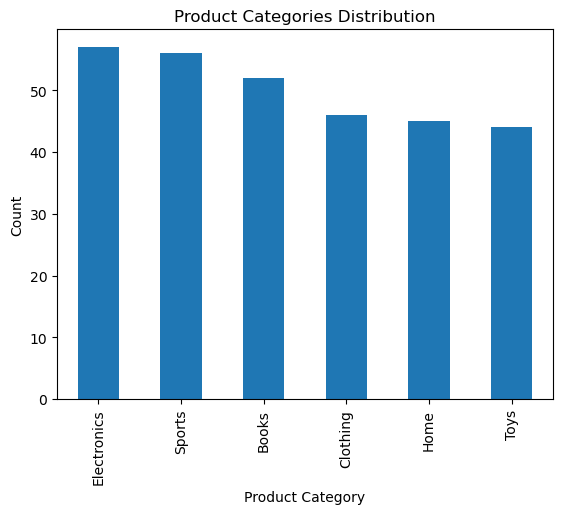

In [13]:
df['ProductCategory'].value_counts().plot(kind='bar', title='Product Categories Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

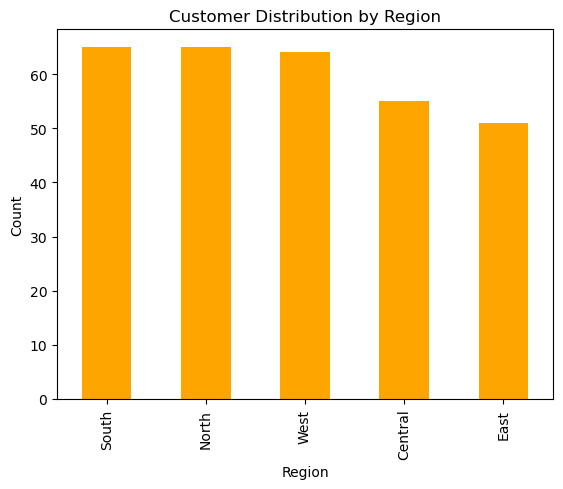

In [14]:
df['Region'].value_counts().plot(kind='bar', color='orange', title='Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

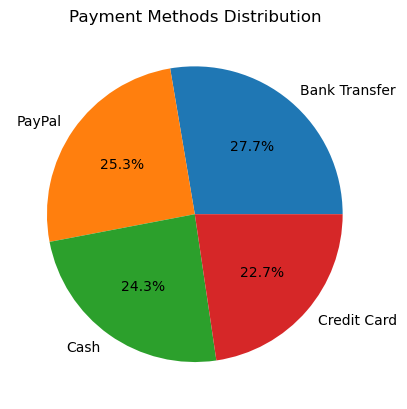

In [15]:
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Payment Methods Distribution')
plt.ylabel('')
plt.show()

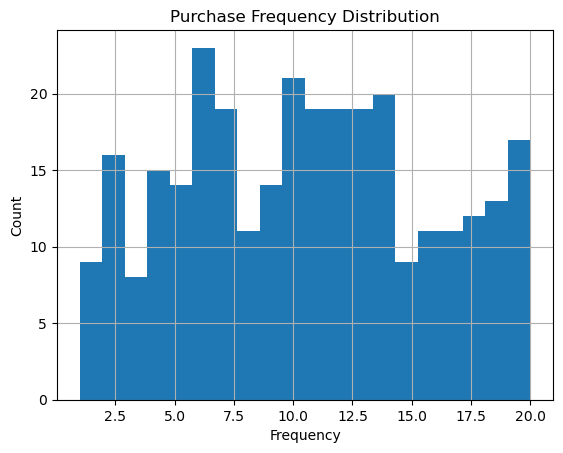

In [16]:
df['Frequency'].hist(bins=20)
plt.title('Purchase Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

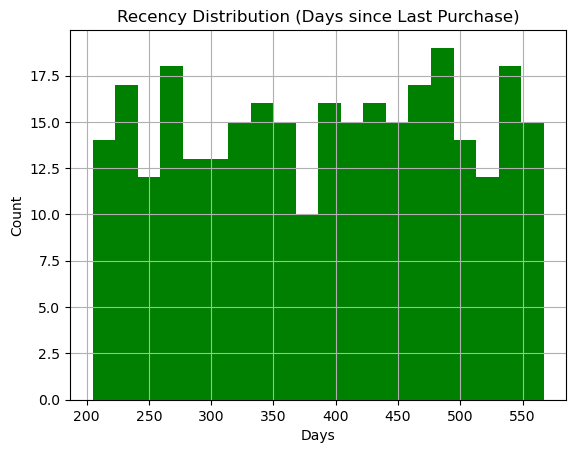

In [17]:
df['Recency'].hist(bins=20, color='green')
plt.title('Recency Distribution (Days since Last Purchase)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

C:\Users\Erdem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


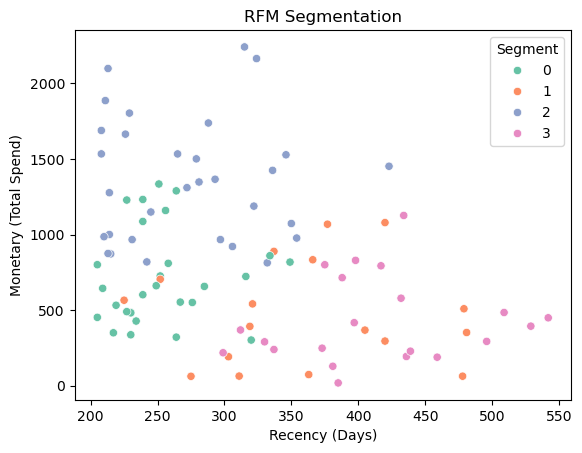

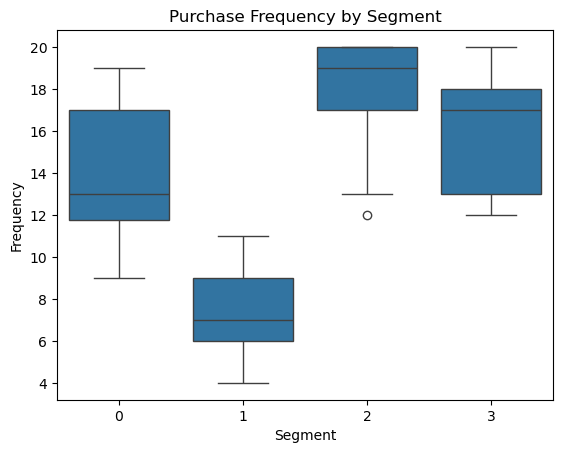

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

monetary = df.groupby('CustomerID')['OrderAmount'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

rfm = df.groupby('CustomerID').agg({
    'Recency': 'min',    
    'Frequency': 'max'   
}).reset_index()

rfm = pd.merge(rfm, monetary, on='CustomerID')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Segment'] = kmeans.fit_predict(rfm_scaled)


sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2')
plt.title('RFM Segmentation')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Total Spend)')
plt.show()


sns.boxplot(data=rfm, x='Segment', y='Frequency')
plt.title('Purchase Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.show()

In [22]:
rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Segment                                 
0         253.2      13.8    711.4    28
1         360.7       7.6    473.8    17
2         273.0      18.0   1360.1    31
3         412.8      16.1    428.9    21

In [23]:
segment_data = pd.merge(df, rfm[['CustomerID', 'Segment']], on='CustomerID')

segment_data.groupby(['Segment', 'ProductCategory']).size().unstack().fillna(0)

ProductCategory,Books,Clothing,Electronics,Home,Sports,Toys
Segment,,,,,,
0,11,9,17,14,14,16
1,5,7,4,4,6,4
2,32,22,32,22,26,17
3,4,8,4,5,10,7
